Mounted at /content/drive
Class distribution before handling:
1    5560
0    1694
2       1
Name: count, dtype: int64


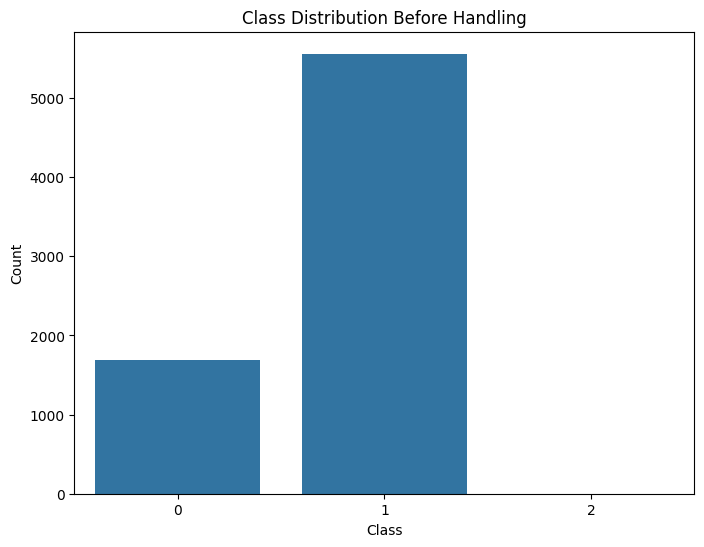

Class distribution after handling:
1    5560
0    1694
Name: count, dtype: int64


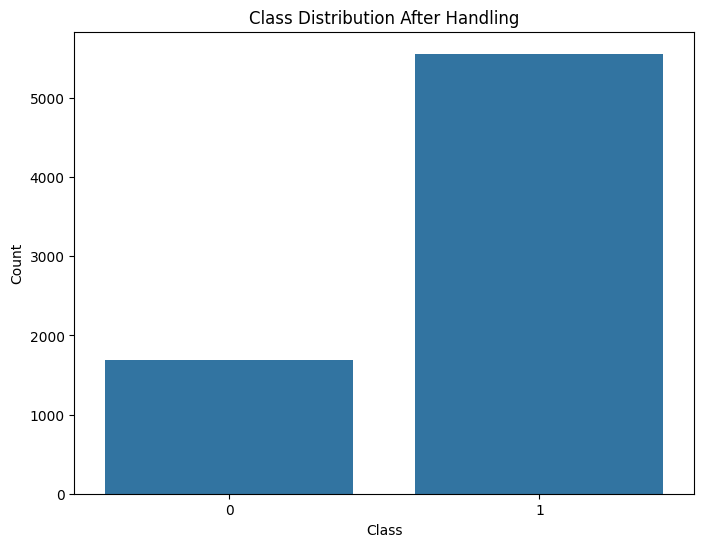

Training SVM...

SVM Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       339
           1       0.98      0.99      0.99      1112

    accuracy                           0.98      1451
   macro avg       0.98      0.97      0.97      1451
weighted avg       0.98      0.98      0.98      1451



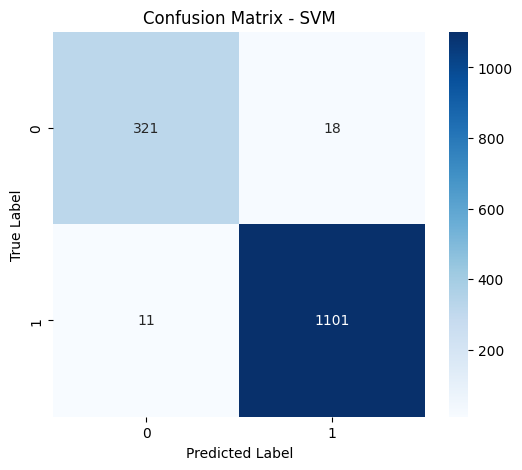

Training KNN...

KNN Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.90      0.93       339
           1       0.97      0.99      0.98      1112

    accuracy                           0.97      1451
   macro avg       0.97      0.94      0.95      1451
weighted avg       0.97      0.97      0.97      1451



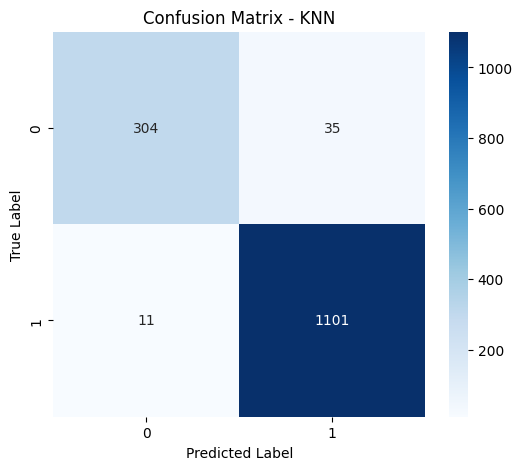

Training Decision Tree...

Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       339
           1       0.97      0.98      0.98      1112

    accuracy                           0.96      1451
   macro avg       0.95      0.94      0.95      1451
weighted avg       0.96      0.96      0.96      1451



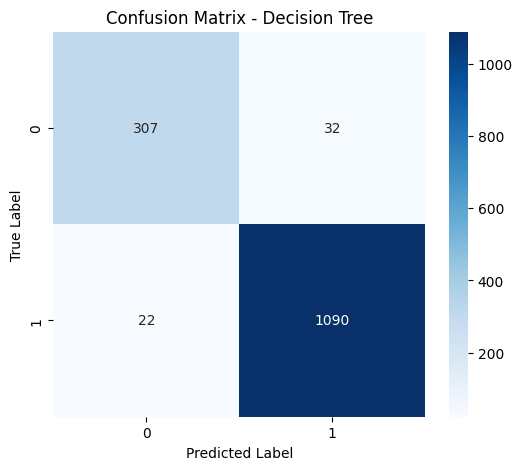

Training Random Forest...

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       339
           1       0.98      0.99      0.98      1112

    accuracy                           0.98      1451
   macro avg       0.97      0.96      0.97      1451
weighted avg       0.98      0.98      0.98      1451



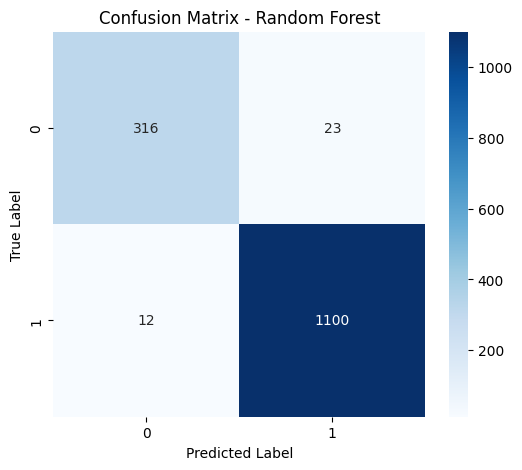


Comparison of Model Performance:
               Accuracy  Precision    Recall  F1 Score   ROC AUC
SVM            0.980014   0.975391  0.968505  0.971891  0.997240
KNN            0.968298   0.967135  0.943432  0.954600  0.981599
Decision Tree  0.962784   0.952305  0.942910  0.947495  0.942788
Random Forest  0.975879   0.971467  0.960681  0.965933  0.997589


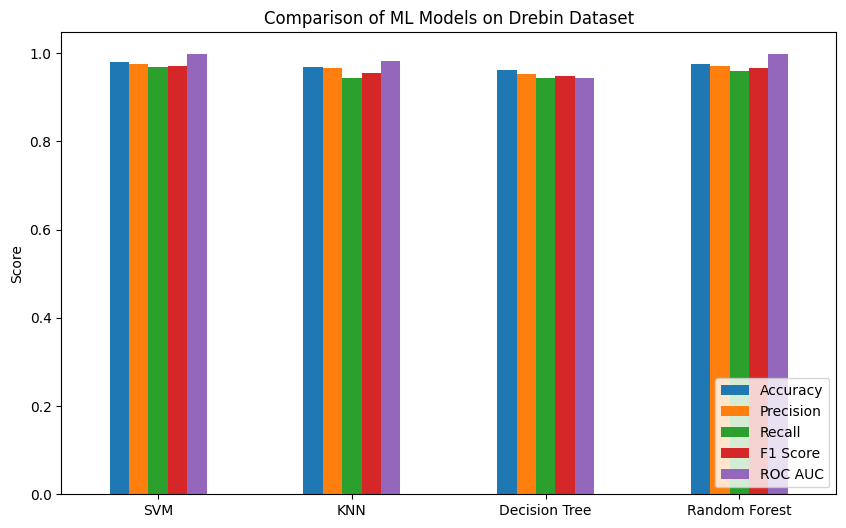

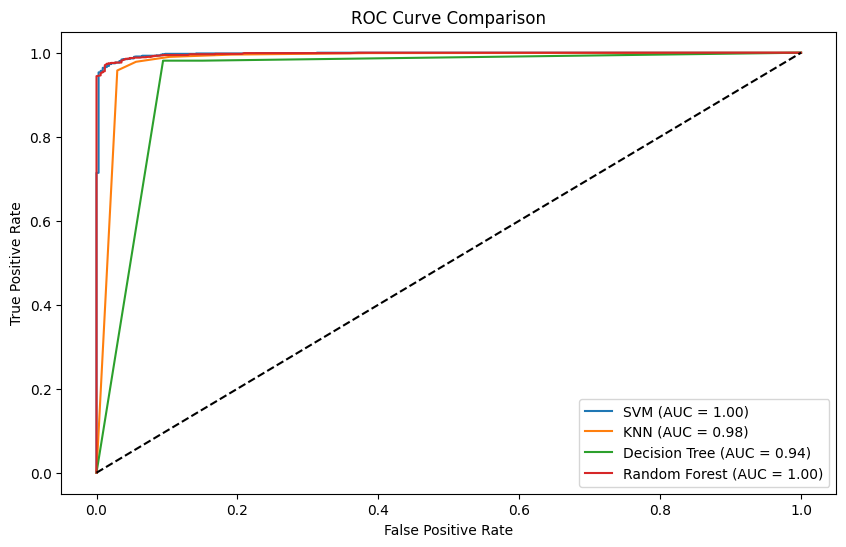

In [ ]:
# Step 1: Import necessary libraries
!pip install pandas numpy scikit-learn seaborn matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Step 2: Load dataset from Google Drive
from google.colab import drive
drive.mount('/content/drive')
dataset_path = '/content/drive/My Drive/drebin.csv'
data = pd.read_csv(dataset_path)

# Step 3: Preprocess Data
X = data.drop(columns=['class'])  # Features
y = data['class']  # Target variable

# Encode categorical features
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = LabelEncoder().fit_transform(X[col])

# Convert to numeric and handle missing values
X = X.apply(pd.to_numeric, errors='coerce')
X.fillna(0, inplace=True)

# Encode the target variable
y = LabelEncoder().fit_transform(y)

# Diagnose class distribution
print("Class distribution before handling:")
print(pd.Series(y).value_counts())
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title("Class Distribution Before Handling")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()
# Find the minority classes

class_counts = pd.Series(y).value_counts()
minority_classes = class_counts[class_counts < 2].index.tolist()

#Remove the rows of the minority class.
for cls in minority_classes:
  indices_to_drop = np.where(y == cls)[0]
  X = X.drop(index = indices_to_drop)
  y = np.delete(y, indices_to_drop)

# Diagnose class distribution
print("Class distribution after handling:")
print(pd.Series(y).value_counts())
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title("Class Distribution After Handling")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# Train-test split (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Stratify the split

# Scale features (only for SVM & KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train and Evaluate Models
models = {
    "SVM": SVC(kernel='rbf', C=1, gamma='scale', probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}

results = {}

for name, model in models.items():
    print(f"Training {name}...")
    if name in ["SVM", "KNN"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probability scores
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]  # Probability scores

    # Store results
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='macro'),
        "Recall": recall_score(y_test, y_pred, average='macro'),
        "F1 Score": f1_score(y_test, y_pred, average='macro'),
        "ROC AUC": roc_auc_score(y_test, y_prob)
    }

    # Print classification report
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Step 5: Compare Model Performance
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"]
comparison_df = pd.DataFrame(results).T[metrics]
print("\nComparison of Model Performance:")
print(comparison_df)

# Plot performance comparison
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title("Comparison of ML Models on Drebin Dataset")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

# Step 6: ROC Curve Plot
plt.figure(figsize=(10, 6))
for name, model in models.items():
    if name in ["SVM", "KNN"]:
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_prob = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()